In [151]:
import pandas as pd
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import re
import numpy as np
import matplotlib.pyplot as plt

from scipy import sparse
from scipy.sparse.linalg import svds

from sklearn.metrics.pairwise import cosine_similarity

from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize


from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\upadh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
dfbert = pd.read_csv('../data/df_bert.csv').dropna().reset_index()

In [5]:
dfbert.columns

Index(['index', 'subject_id', 'hadm_id', 'discharge_instruction', 'icd_E11',
       'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50', 'icd_N17',
       'icd_Y92', 'icd_Z85'],
      dtype='object')

In [131]:
def Accuracy(y_true, y_pred):

    temp = 0

    for i in range(y_true.shape[0]):
        temp += sum(np.logical_and(y_true[i], y_pred[i])) / sum(np.logical_or(y_true[i], y_pred[i]))
    return temp / y_true.shape[0]

In [214]:
def Hamming_Loss(y_true, y_pred):
    temp=0
    for i in range(y_true.shape[0]):
        temp += np.size(y_true[i] == y_pred[i]) - np.count_nonzero(y_true[i] == y_pred[i])
    return temp/(y_true.shape[0] * y_true.shape[1])

In [6]:
categories = ['icd_E11', 'icd_E78','icd_E87', 'icd_F32', 'icd_I16', 'icd_I50', 'icd_N17', 'icd_Y92','icd_Z85']



train, test = train_test_split(dfbert, random_state=42, test_size=0.33, shuffle=True)
X_train = train.discharge_instruction
X_test = test.discharge_instruction
y_train = train[categories]
y_test = test[categories]

print(X_train.shape)
print(X_test.shape)

(175298,)
(86341,)


**Tfidf MultinomialNB**

In [10]:
# traing classifier

# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

var_pre = {}


for category in categories:
    print('... Processing {}'.format(category))
    
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    var_pre[category] = prediction
    
    
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

nb_pred = pd.DataFrame(var_pre)

print(nb_pred)

... Processing icd_E11
Test accuracy is 0.7000845484763901
... Processing icd_E78
Test accuracy is 0.6099303922817665
... Processing icd_E87
Test accuracy is 0.7887330468722855
... Processing icd_F32
Test accuracy is 0.7971878945112982
... Processing icd_I16
Test accuracy is 0.6976754959984248
... Processing icd_I50
Test accuracy is 0.8367056207363824
... Processing icd_N17
Test accuracy is 0.8132173590762211
... Processing icd_Y92
Test accuracy is 0.817491110827996
... Processing icd_Z85
Test accuracy is 0.8066967026094208
       icd_E11  icd_E78  icd_E87  icd_F32  icd_I16  icd_I50  icd_N17  icd_Y92  \
0            0        0        0        0        0        0        0        0   
1            0        1        0        0        1        0        0        0   
2            0        1        0        0        0        0        0        0   
3            0        1        0        0        0        0        0        0   
4            0        0        0        0        0        0      

In [14]:
y_true = y_test.to_numpy()
y_pred1 = nb_pred.to_numpy()

In [15]:
print(y_test.columns, ((abs(np.diff([y_test.to_numpy(), nb_pred.to_numpy()], axis=0))).sum(axis=1)/len(y_test))*100)
print('Accuracy Score with the discharge_instruction as variable is for multiNB',  Accuracy(y_true, y_pred1))
print('Hamming_loss with the discharge_instruction as variable is for multiNB', Hamming_Loss(y_true, y_pred1))

Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[29.99154515 39.00696077 21.12669531 20.28121055 30.2324504  16.32943793
  18.67826409 18.25088892 19.33032974]]
Accuracy Score with the discharge_instruction as variable is for multiNB 0.15303936054217776
Hamming_loss with the discharge_instruction as variable is for multiNB 0.23691975873442384


**Tfidf LinearSVC**

In [16]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
var_pre = {}

for category in categories:
    print('... Processing {}'.format(category))
   
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    var_pre[category] = prediction
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
svc_pred = pd.DataFrame(var_pre)

print(svc_pred)

... Processing icd_E11
Test accuracy is 0.7025978388019597
... Processing icd_E78
Test accuracy is 0.5999698868440254
... Processing icd_E87
Test accuracy is 0.8002455380410234
... Processing icd_F32
Test accuracy is 0.7948367519486687
... Processing icd_I16
Test accuracy is 0.7097555043374527
... Processing icd_I50
Test accuracy is 0.8547503503549878
... Processing icd_N17
Test accuracy is 0.839218911061952
... Processing icd_Y92
Test accuracy is 0.825482679144323
... Processing icd_Z85
Test accuracy is 0.8028862301803315
       icd_E11  icd_E78  icd_E87  icd_F32  icd_I16  icd_I50  icd_N17  icd_Y92  \
0            0        0        0        0        1        0        0        0   
1            0        1        0        0        1        0        0        0   
2            0        1        0        0        0        0        0        0   
3            0        0        0        0        0        1        0        0   
4            0        0        0        1        1        0       

In [17]:
y_true = y_test.to_numpy()
y_pred2 = svc_pred.to_numpy()

In [18]:
print(y_test.columns, ((abs(np.diff([y_test.to_numpy(), nb_pred.to_numpy()], axis=0))).sum(axis=1)/len(y_test))*100)
print('Accuracy Score with the discharge_instruction as variable is for lineraSVC',  Accuracy(y_true, y_pred2))
print('Hamming_loss with the discharge_instruction as variable is for linearSVC', Hamming_Loss(y_true, y_pred2))

Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[29.99154515 39.00696077 21.12669531 20.28121055 30.2324504  16.32943793
  18.67826409 18.25088892 19.33032974]]
Accuracy Score with the discharge_instruction as variable is for lineraSVC 0.28010256673290657
Hamming_loss with the discharge_instruction as variable is for linearSVC 0.23002847880947508


**Tfidf LogReg**

In [19]:
LogReg_pipeline = Pipeline([
#                 ('tfidf', TfidfVectorizer(stop_words=list(stop_words), ngrams(2, 2), min_df=10),
                ('tfidf', TfidfVectorizer(stop_words=list(stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
#tfidf', TfidfVectorizer(stop_words=list(stop_words), ngrams(2, 2), min_df=10)
    
var_pre = {}

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    var_pre[category] = prediction
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

logreg_pred = pd.DataFrame(var_pre)

print(logreg_pred)

... Processing icd_E11
Test accuracy is 0.7141798218691005
... Processing icd_E78
Test accuracy is 0.6127795601162831
... Processing icd_E87
Test accuracy is 0.8047625114372082
... Processing icd_F32
Test accuracy is 0.7990410118020408
... Processing icd_I16
Test accuracy is 0.7132764271898634
... Processing icd_I50
Test accuracy is 0.8577500839693772
... Processing icd_N17
Test accuracy is 0.8436432285935997
... Processing icd_Y92
Test accuracy is 0.8281002073174969
... Processing icd_Z85
Test accuracy is 0.8067082845924879
       icd_E11  icd_E78  icd_E87  icd_F32  icd_I16  icd_I50  icd_N17  icd_Y92  \
0            0        0        0        0        0        0        0        0   
1            0        1        0        0        1        0        0        0   
2            0        0        0        0        0        0        0        0   
3            0        1        0        0        0        1        0        0   
4            0        0        0        0        1        0     

In [20]:
y_true = y_test.to_numpy()
y_pred3 = logreg_pred.to_numpy()

In [37]:
print(y_test.columns, ((abs(np.diff([y_test.to_numpy(), nb_pred.to_numpy()], axis=0))).sum(axis=1)/len(y_test))*100)
print('Accuracy Score with the discharge_instruction as variable is for tfidf_logReg',  Accuracy(y_true, y_pred3))
print('Hamming_loss with the discharge_instruction as variable is for tfidf_logReg', Hamming_Loss(y_true, y_pred3))

Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[37.26155592 39.04865591 39.30230134 31.73695    30.68762233 29.26419662
  38.8540786  21.79265934 24.75185601]]
Accuracy Score with the discharge_instruction as variable is for tfidf_logReg 0.2660085986113052
Hamming_loss with the discharge_instruction as variable is for tfidf_logReg 0.2244176514569491


**Countvectorizer multiNB**

In [24]:
# traing classifier

# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('vect', CountVectorizer(stop_words=stopwords.words('english'))),
#                 ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

var_pre = {}


for category in categories:
    print('... Processing {}'.format(category))
    
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    var_pre[category] = prediction
    
    
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

nb_pred = pd.DataFrame(var_pre)

print(nb_pred)

... Processing icd_E11
Test accuracy is 0.6273844407639476
... Processing icd_E78
Test accuracy is 0.6095134408913494
... Processing icd_E87
Test accuracy is 0.6069769865996456
... Processing icd_F32
Test accuracy is 0.682630499994209
... Processing icd_I16
Test accuracy is 0.6931237766530385
... Processing icd_I50
Test accuracy is 0.7073580338425545
... Processing icd_N17
Test accuracy is 0.6114592140466291
... Processing icd_Y92
Test accuracy is 0.7820734066086795
... Processing icd_Z85
Test accuracy is 0.7524814398721349
       icd_E11  icd_E78  icd_E87  icd_F32  icd_I16  icd_I50  icd_N17  icd_Y92  \
0            1        0        1        0        0        0        0        0   
1            0        1        0        0        1        0        0        0   
2            0        0        1        1        0        1        1        1   
3            1        1        1        0        0        1        1        0   
4            0        0        1        1        0        0      

In [25]:
y_true = y_test.to_numpy()
y_pred4 = nb_pred.to_numpy()

In [27]:
print(y_test.columns, ((abs(np.diff([y_test.to_numpy(), nb_pred.to_numpy()], axis=0))).sum(axis=1)/len(y_test))*100)
print('Accuracy Score with the discharge_instruction as variable is for countvec multiNB',  Accuracy(y_true, y_pred4))
print('Hamming_loss with the discharge_instruction as variable is for countvec multiNB', Hamming_Loss(y_true, y_pred4))

Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[37.26155592 39.04865591 39.30230134 31.73695    30.68762233 29.26419662
  38.8540786  21.79265934 24.75185601]]
Accuracy Score with the discharge_instruction as variable is for multiNB 0.30559664861534935
Hamming_loss with the discharge_instruction as variable is for multiNB 0.3252220845253124


**Countvectorizer linerSVC**

In [28]:
SVC_pipeline = Pipeline([
                ('vect', CountVectorizer(stop_words=stopwords.words('english'))),
#                 ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
var_pre = {}

for category in categories:
    print('... Processing {}'.format(category))
   
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    var_pre[category] = prediction
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
svc_pred = pd.DataFrame(var_pre)

print(svc_pred)

... Processing icd_E11


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test accuracy is 0.6748705713392247
... Processing icd_E78


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test accuracy is 0.583060191566
... Processing icd_E87


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test accuracy is 0.7753906023789393
... Processing icd_F32


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test accuracy is 0.7658470483316153
... Processing icd_I16


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test accuracy is 0.6921856360246001
... Processing icd_I50


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test accuracy is 0.833045714087166
... Processing icd_N17


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test accuracy is 0.8162055107075433
... Processing icd_Y92


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test accuracy is 0.8009404570250518
... Processing icd_Z85


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test accuracy is 0.7694722090316304
       icd_E11  icd_E78  icd_E87  icd_F32  icd_I16  icd_I50  icd_N17  icd_Y92  \
0            0        0        1        1        1        0        0        0   
1            0        1        0        0        1        0        0        0   
2            0        1        0        0        0        0        0        0   
3            0        0        0        0        1        1        1        0   
4            0        0        0        1        0        0        0        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
86336        0        0        0        1        0        0        0        0   
86337        0        0        0        0        0        0        0        0   
86338        0        0        0        0        0        1        0        0   
86339        0        0        0        0        0        0        0        0   
86340        0        0        0        0        0        0        1     

In [30]:
y_true = y_test.to_numpy()
y_pred5 = svc_pred.to_numpy()

In [34]:
print(y_test.columns, ((abs(np.diff([y_test.to_numpy(), nb_pred.to_numpy()], axis=0))).sum(axis=1)/len(y_test))*100)
print('Accuracy Score with the discharge_instruction as variable is for countvect linearSVC',  Accuracy(y_true, y_pred5))
print('Hamming_loss with the discharge_instruction as variable is for countvect linearSVC', Hamming_Loss(y_true, y_pred5))

Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[37.26155592 39.04865591 39.30230134 31.73695    30.68762233 29.26419662
  38.8540786  21.79265934 24.75185601]]
Accuracy Score with the discharge_instruction as variable is for countvect linearSVC 0.26893652852670996
Hamming_loss with the discharge_instruction as variable is for countvect linearSVC 0.2543313399453588


**Countvectorizer logReg**

In [33]:
LogReg_pipeline = Pipeline([
                ('vect', CountVectorizer(stop_words=stopwords.words('english'))),
#                 ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

var_pre = {}

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    var_pre[category] = prediction
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

logreg_pred = pd.DataFrame(var_pre)

print(logreg_pred)

... Processing icd_E11


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.7079487149789787
... Processing icd_E78


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.6053091810379774
... Processing icd_E87


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.8014269003138718
... Processing icd_F32


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.7950220636777429
... Processing icd_I16


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.710195619694004
... Processing icd_I50


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.855757982881829
... Processing icd_N17


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.840539257131606
... Processing icd_Y92


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.8234442501245063
... Processing icd_Z85


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.8034074194183528
       icd_E11  icd_E78  icd_E87  icd_F32  icd_I16  icd_I50  icd_N17  icd_Y92  \
0            0        0        0        0        1        0        0        0   
1            0        1        0        0        1        0        0        0   
2            0        0        0        0        0        0        0        0   
3            0        1        0        0        0        1        1        0   
4            0        0        0        0        1        0        0        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
86336        0        0        0        1        0        0        0        0   
86337        0        0        0        0        0        0        0        0   
86338        0        0        0        0        0        1        0        0   
86339        0        0        0        0        0        0        0        0   
86340        0        0        0        0        0        0        1     

In [35]:
y_true = y_test.to_numpy()
y_pred6 = logreg_pred.to_numpy()

In [122]:
print(y_test.columns, ((abs(np.diff([y_test.to_numpy(), nb_pred.to_numpy()], axis=0))).sum(axis=1)/len(y_test))*100)
print('Accuracy Score with the discharge_instruction as variable is for countvect logReg',  Accuracy(y_true, y_pred6))
print('Hamming_loss with the discharge_instruction as variable is for countvect logReg', Hamming_Loss(y_true, y_pred6))

ValueError: operands could not be broadcast together with shapes (86341,9) (330,9) 

In [ ]:
#  ngram_range=(1, 1)
# vectorizer = TfidfVectorizer()
# >>> X = vectorizer.fit_transform(corpus)
# >>> vectorizer.get_feature_names_out()
# array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
#        'this'], ...)
# >>> print(X.shape)

In [40]:
vocb_dic = LogReg_pipeline['vect'].vocabulary_
vocb_dic

{'admitted': 6823,
 'hospital': 44214,
 'fall': 36490,
 'found': 39233,
 'urinary': 93499,
 'tract': 90939,
 'infection': 47490,
 'treated': 91467,
 'antibiotics': 9242,
 'also': 8101,
 'fracture': 39298,
 'pelvis': 66541,
 'wrist': 97803,
 'orthopedics': 63732,
 'plastic': 68107,
 'hand': 41861,
 'surgery': 85888,
 'evaluated': 34959,
 'stabilized': 82892,
 'fractures': 39330,
 'follow': 38601,
 'future': 39947,
 'management': 54728,
 'evaluation': 34996,
 'meanwhile': 55366,
 'continue': 23237,
 'work': 97354,
 'physical': 67420,
 'therapy': 88687,
 'gain': 40076,
 'strength': 84371,
 'mobilityif': 57512,
 'shortness': 80256,
 'breath': 15987,
 'fevers': 37155,
 'cough': 23906,
 'burning': 16638,
 'urination': 93536,
 'diarrhea': 28083,
 'abdominal': 5293,
 'pain': 65040,
 'please': 68230,
 'let': 52232,
 'care': 17669,
 'providers': 71688,
 'know': 50930,
 'constipation': 22934,
 'well': 96578,
 'dear': 26379,
 'pleasure': 68258,
 'taking': 87380,
 'recurrent': 74303,
 'rectal': 742

**Using the three ways to do the multilable classification using the skmultilearn**

In [43]:
# from sklearn.linear_model import Logis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

In [45]:
pip install scikit-multilearn

     ---------------------------------------- 89.4/89.4 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [47]:
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

In [49]:
pip install neattext

     -------------------------------------- 114.7/114.7 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [51]:
import neattext as nt
import neattext.functions as nfx

In [53]:
dfbert.head()

,index,subject_id,hadm_id,discharge_instruction,icd_E11,icd_E78,icd_E87,icd_F32,icd_I16,icd_I50,icd_N17,icd_Y92,icd_Z85
0,0,10000980,29654838,dear you were admitted for shortness of brea...,1,1,0,0,0,1,0,0,0
1,1,10000980,26913865,dear it was a pleasure caring for you at as...,1,0,0,0,0,1,0,0,0
2,2,10000980,24947999,dear were admitted to on with shortness of ...,1,1,0,0,0,1,0,0,0
3,3,10000980,25242409,dear it was a pleasure caring for you at you ...,1,1,0,0,0,1,1,1,0
4,4,10000980,25911675,dear it was a pleasure caring for you you were...,1,0,0,0,0,1,0,0,0


In [298]:
df = dfbert.sample(1000)

In [299]:
df['discharge_instruction'].apply(lambda x:nt.TextFrame(x).noise_scan())

4294      {'text_noise': 8.814589665653495, 'text_length...
110419    {'text_noise': 9.042553191489363, 'text_length...
94398     {'text_noise': 6.493506493506493, 'text_length...
141197    {'text_noise': 9.03010033444816, 'text_length'...
67682     {'text_noise': 12.935323383084576, 'text_lengt...
                                ...                        
36665     {'text_noise': 9.038322487346347, 'text_length...
110158    {'text_noise': 8.038147138964577, 'text_length...
181937    {'text_noise': 0, 'text_length': 8, 'noise_cou...
58807     {'text_noise': 9.541984732824428, 'text_length...
153401    {'text_noise': 10.551181102362204, 'text_lengt...
Name: discharge_instruction, Length: 1000, dtype: object

In [58]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [300]:
df['discharge_instruction'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())
df['discharge_instruction'].apply(lambda x:nt.TextExtractor(x).extract_numbers())

4294                  []
110419                []
94398                 []
141197                []
67682                 []
               ...      
36665                 []
110158            [1015]
181937                []
58807                 []
153401    [10, 5, 3, 24]
Name: discharge_instruction, Length: 1000, dtype: object

In [ ]:
# remove_multiple_spaces
# remove_numbers
# remove_punctuations
# remove_special_characters
# remove_stopwords
# remove_street_address

In [301]:
#clenaing the feature
df['text']= df['discharge_instruction'].apply(nfx.remove_multiple_spaces, 
                                 nfx.remove_numbers)
df['text'] = df['text'].apply(nfx.remove_punctuations,
                                 nfx.remove_special_characters)
df['text'] = df['text'].apply(nfx.remove_stopwords,
                                 nfx.remove_street_address)

In [302]:
corpus = df['text']

In [303]:
type(corpus)

pandas.core.series.Series

In [304]:
tfidf = TfidfVectorizer() #tokenizer 

In [305]:
xfeatures = tfidf.fit_transform(corpus).toarray() #feature selection

In [306]:
df.columns
y = df[['icd_E11',
       'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50', 'icd_N17',
       'icd_Y92', 'icd_Z85',]]

In [307]:
X_train, X_test, y_train, y_test= train_test_split(xfeatures, y, 
                                                   random_state=42, test_size=0.33, shuffle=True)

In [308]:
#BinaryRelevance classifier

binary_rel_clf = BinaryRelevance(MultinomialNB())
binary_logreg = BinaryRelevance(LogisticRegression())

classifier_chain_nb = ClassifierChain(MultinomialNB())
classifier_chain_logreg = ClassifierChain(LogisticRegression())

label_powerset_nb = LabelPowerset(MultinomialNB())
label_powerset_logreg = LabelPowerset(LogisticRegression()) 

In [261]:
tfidf.vocabulary_

{'dear': 7588,
 'pleasure': 19852,
 'taking': 25610,
 'care': 4958,
 'recent': 21512,
 'admission': 1731,
 'came': 4785,
 'worsening': 28591,
 'foot': 11242,
 'pain': 18862,
 'infection': 13755,
 'vascular': 27610,
 'surgeons': 25175,
 'cleaned': 5731,
 'wounds': 28628,
 'revascularized': 22563,
 'right': 22671,
 'leg': 15114,
 'angioplasty': 2356,
 'completed': 6215,
 'course': 6949,
 'antibiotics': 2430,
 'hospitalized': 12872,
 'kidneys': 14715,
 'temporary': 25814,
 'problems': 20651,
 'improved': 13453,
 'iv': 14566,
 'fluids': 11073,
 'diuresis': 8686,
 'found': 11361,
 'malnutrition': 15923,
 'peg': 19337,
 'tube': 26921,
 'placed': 19730,
 'order': 18432,
 'recieve': 21535,
 'nutrition': 17967,
 'need': 17372,
 'continue': 6637,
 'feeds': 10674,
 'approximately': 2851,
 'months': 16869,
 'pressure': 20503,
 'heals': 12284,
 'bed': 3679,
 'follow': 11160,
 'surgery': 25196,
 'podiatry': 19948,
 'patient': 19243,
 'wish': 28478,
 'best': 3922,
 'healthsincerelyyour': 12300,
 'tea

In [259]:
np.exp(binary_rel_clf.classifiers_[0].feature_log_prob_[1])

array([1.98784895e-05, 1.84687954e-05, 1.84687954e-05, ...,
       2.18016792e-05, 1.84687954e-05, 1.84687954e-05])

In [404]:
# finding the frequecy of the token

# Fill this in to build a DataFrame of words and their counts
word_countsbi_z85 = pd.DataFrame({
    'words_z85': tfidf.get_feature_names_out(), #sorted(vocb_dic.keys()) can also give it in the same order
    #becoz the vocb_dic is not in the same order for count(frequency) so we can not use the dic.keys for word to match the grefuency
    'conditional_probabilty': np.exp(binary_rel_clf.classifiers_[8].feature_log_prob_[1])
#     'frequency': LogReg_pipeline['tfidf'].fit_transform(X_train).sum(axis = 0)
})

#

# word_countsbi_e11.sort_values('conditional_probabilty', ascending=False)
# word_countsbi_z85.sort_values('conditional_probabilty', ascending=False).head(10)

word_countsbi_f32.sort_values('conditional_probabilty', ascending=False).head(10)

,words_f32,conditional_probabilty
3696,pain,0.001209
747,blood,0.001103
893,care,0.000943
3180,medications,0.000823
2483,hospital,0.000822
265,admitted,0.000819
2392,heart,0.000798
1539,discharge,0.000772
399,antibiotics,0.000715
2150,follow,0.000715


In [398]:
word_countsbi_z85.sort_values('conditional_probabilty', ascending=False).head(10)

,words,conditional_probabilty
3696,pain,0.001046
2483,hospital,0.000911
747,blood,0.000850
893,care,0.000750
3167,medication,0.000741
265,admitted,0.000740
3180,medications,0.000709
5021,surgery,0.000704
2392,heart,0.000672
5113,taking,0.000663


In [397]:
word_countsbi_e11.sort_values('conditional_probabilty', ascending=False).head(10)

,words,conditional_probabilty
18862,pain,0.003123
12798,hospital,0.002868
4230,blood,0.002864
4958,care,0.002832
12319,heart,0.002575
16232,medications,0.002557
1774,admitted,0.002426
7588,dear,0.002220
25610,taking,0.002135
19852,pleasure,0.002003


In [132]:
# y_true = y_test.to_numpy()

In [309]:
binary_rel_clf.fit(X_train, y_train)
br_pred = binary_rel_clf.predict(X_test)
print(accuracy_score(y_test, br_pred))
# print(Accuracy(y_true, br_pred))
print(Hamming_Loss(y_test.to_numpy(), br_pred))


# 0.02878787878787879
# 0.24737373737373738

0.00909090909090909
0.24882154882154883


In [310]:
binary_logreg.fit(X_train, y_train)
blog_pred = binary_logreg.predict(X_test)
print(accuracy_score(y_test, blog_pred))
# print(Accuracy(y_true, br_pred))
print(Hamming_Loss(y_test.to_numpy(), blog_pred))

# 0.07469696969696969
# 0.2317003367003367

0.024242424242424242
0.24511784511784512


In [311]:
classifier_chain_nb.fit(X_train, y_train)
ccnb_pred = classifier_chain_nb.predict(X_test)
print(accuracy_score(y_test, ccnb_pred))
# print(Accuracy(y_true, br_pred))
print(Hamming_Loss(y_test.to_numpy(), ccnb_pred))

# 0.030303030303030304
# 0.24668350168350167

0.00909090909090909
0.24882154882154883


In [321]:
classifier_chain_logreg.fit(X_train, y_train)
cclog_pred = classifier_chain_logreg.predict(X_test)
print(accuracy_score(y_test, cclog_pred))
# print(Accuracy(y_true, br_pred))
print(Hamming_Loss(y_test.to_numpy(), cclog_pred))

# 0.079696969696969
# 0.2321885521885522

0.012121212121212121
0.24915824915824916


In [314]:
label_powerset_nb.fit(X_train, y_train)
lpsnb_pred = label_powerset_nb.predict(X_test)
print(accuracy_score(y_test, lpsnb_pred))
# print(Accuracy(y_true, br_pred))
print(Hamming_Loss(y_test.to_numpy(), lpsnb_pred))

# 0.09136363636363637
# 0.25996632996632996

0.08787878787878788
0.2612794612794613


In [313]:
label_powerset_logreg.fit(X_train, y_train)
lpslog_pred = label_powerset_logreg.predict(X_test)
print(accuracy_score(y_test, lpslog_pred))
# print(Accuracy(y_true, br_pred))
print(Hamming_Loss(y_test.to_numpy(), lpslog_pred))

# 0.10742424242424242
# 0.2528956228956229

0.09090909090909091
0.26666666666666666


In [323]:
y_true = y_test.to_numpy()

In [150]:
y_test.to_numpy()

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 1]], dtype=int64)

In [319]:
blog_pred.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [325]:
print(y_test.columns, (abs(np.diff([y_true, blog_pred.toarray()], axis=0)).sum(axis=1)/len(y_true))*100)

Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[31.81818182 42.42424242 26.06060606 18.78787879 27.87878788 18.18181818
  20.         14.84848485 20.60606061]]


In [327]:
print(print(y_test.columns, 100 -(abs(np.diff([y_true, blog_pred.toarray()], axis=0)).sum(axis=1)/len(y_true))*100))

Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[68.18181818 57.57575758 73.93939394 81.21212121 72.12121212 81.81818182
  80.         85.15151515 79.39393939]]
None


In [320]:
lpslog_pred.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [326]:
print(y_test.columns, (abs(np.diff([y_true, lpslog_pred.toarray()], axis=0)).sum(axis=1)/len(y_true))*100)

Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[31.81818182 42.42424242 25.75757576 21.51515152 40.60606061 20.
  20.3030303  16.06060606 21.51515152]]


In [328]:
print(print(y_test.columns, 100 -(abs(np.diff([y_true, lpslog_pred.toarray()], axis=0)).sum(axis=1)/len(y_true))*100))

Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[68.18181818 57.57575758 74.24242424 78.48484848 59.39393939 80.
  79.6969697  83.93939394 78.48484848]]
None


In [322]:
cclog_pred.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [329]:
print(print(y_test.columns, (abs(np.diff([y_true, cclog_pred.toarray()], axis=0)).sum(axis=1)/len(y_true))*100))

Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[31.81818182 43.93939394 26.06060606 18.78787879 29.09090909 19.09090909
  20.         14.84848485 20.60606061]]
None


In [330]:
print(print(y_test.columns, 100 -(abs(np.diff([y_true, cclog_pred.toarray()], axis=0)).sum(axis=1)/len(y_true))*100))

Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[68.18181818 56.06060606 73.93939394 81.21212121 70.90909091 80.90909091
  80.         85.15151515 79.39393939]]
None


In [ ]:
print(y_test.columns, (abs(np.diff([y_true, logreg_pred], axis=0)).sum(axis=1)/len(y_true))*100)

In [202]:
df = dfbert.sample(25000, random_state=42)

In [239]:
categories = ['icd_E11', 'icd_E78','icd_E87', 'icd_F32', 'icd_I16', 'icd_I50', 'icd_N17', 'icd_Y92','icd_Z85']



train, test = train_test_split(dfbert, random_state=42, test_size=0.33, shuffle=True)
X_train = train.discharge_instruction
X_test = test.discharge_instruction
y_train = train[categories]
y_test = test[categories]

print(X_train.shape)
print(X_test.shape)

(175298,)
(86341,)


In [207]:
LogReg_pipeline = Pipeline([
#                 ('tfidf', TfidfVectorizer(stop_words=list(stop_words), ngrams(2, 2), min_df=10),
                ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
                 ])
#tfidf', TfidfVectorizer(stop_words=list(stop_words), ngrams(2, 2), min_df=10)
    
var_pre = {}

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    var_pre[category] = prediction
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

logreg_pred = pd.DataFrame(var_pre)

print(logreg_pred)

... Processing icd_E11
Test accuracy is 0.7141798218691005
... Processing icd_E78
Test accuracy is 0.6127795601162831
... Processing icd_E87
Test accuracy is 0.8047625114372082
... Processing icd_F32
Test accuracy is 0.7990410118020408
... Processing icd_I16
Test accuracy is 0.7132764271898634
... Processing icd_I50
Test accuracy is 0.8577500839693772
... Processing icd_N17
Test accuracy is 0.8436432285935997
... Processing icd_Y92
Test accuracy is 0.8281002073174969
... Processing icd_Z85
Test accuracy is 0.8067082845924879
       icd_E11  icd_E78  icd_E87  icd_F32  icd_I16  icd_I50  icd_N17  icd_Y92  \
0            0        0        0        0        0        0        0        0   
1            0        1        0        0        1        0        0        0   
2            0        0        0        0        0        0        0        0   
3            0        1        0        0        0        1        0        0   
4            0        0        0        0        1        0     

In [247]:
y_true = y_test.to_numpy()

In [248]:
print(y_test.columns, (abs(np.diff([y_true, logreg_pred], axis=0)).sum(axis=1)/len(y_true))*100)

Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[29.28041139 39.27682098 20.34954425 20.24299    28.5217915  14.28058512
  16.0074588  17.29074252 19.29442559]]


<!-- Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[28.58201781 38.72204399 19.52374886 20.09589882 28.67235728 14.2249916
  15.63567714 17.18997927 19.32917154]]

0.08915810565084954
0.2660085986113052
0.2244176514569491 -->

In [249]:
print(accuracy_score(y_true, logreg_pred))
print(Accuracy(y_true, logreg_pred.to_numpy()))
print(Hamming_Loss(y_true, logreg_pred.to_numpy()))

0.08215100589522938
0.24228120117298582
0.2272719668394956


In [ ]:
TfidfVectorizer

In [ ]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(2, 3), max_df=1.0, min_df=10, stop_words=list(stop_words))),
#                 ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
#                 ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
                ('clf', LogisticRegression(solver='sag')),
                 ])
#tfidf', TfidfVectorizer(stop_words=list(stop_words), ngrams(2, 2), min_df=10)
    
var_pre = {}

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    var_pre[category] = prediction
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

logreg_pred = pd.DataFrame(var_pre)

print(logreg_pred)

In [ ]:
Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[29.28041139 39.27682098 20.34954425 20.24299    28.5217915  14.28058512
  16.0074588  17.29074252 19.29442559]]
print(accuracy_score(y_true, logreg_pred))
print(Accuracy(y_true, logreg_pred.to_numpy()))
print(Hamming_Loss(y_true, logreg_pred.to_numpy()))
print(accuracy_score(y_true, logreg_pred))

In [360]:
def Precision(y_true, y_pred):
      temp = 0
      for i in range(y_true.shape[0]):
          if sum(y_pred[i]) == 0:
              continue
          temp+= sum(np.logical_and(y_true[i], y_pred[i]))/ sum(y_pred[i])
      return temp/ y_true.shape[0]

In [361]:
Precision(y_true, blog_pred.toarray())

0.13232323232323234

In [224]:
print(y_test.columns, (abs(np.diff([y_true, logreg_pred], axis=0)).sum(axis=1)/len(y_true))*100)

Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[29.28041139 39.27682098 20.34954425 20.24299    28.5217915  14.28058512
  16.0074588  17.29074252 19.29442559]]


In [225]:
print(accuracy_score(y_true, logreg_pred))
print(Accuracy(y_true, logreg_pred.to_numpy()))
print(Hamming_Loss(y_true, logreg_pred.to_numpy()))

0.08215100589522938
0.242283131503497
0.2272719668394956


In [250]:
tfidf_dic = LogReg_pipeline['tfidf'].vocabulary_
tfidf_dic

{'admitted hospital': 5084,
 'hospital fall': 78187,
 'fall found': 59672,
 'found urinary': 67197,
 'urinary tract': 168010,
 'tract infection': 162845,
 'infection treated': 85957,
 'treated antibiotics': 163899,
 'antibiotics also': 9918,
 'also found': 7616,
 'found fracture': 66617,
 'fracture pelvis': 67358,
 'hand surgery': 71936,
 'surgery evaluated': 153220,
 'follow orthopedics': 64523,
 'future management': 68336,
 'management evaluation': 98856,
 'continue work': 37393,
 'work physical': 175179,
 'physical therapy': 120172,
 'gain strength': 68504,
 'shortness breath': 142036,
 'breath fevers': 22283,
 'fevers cough': 61268,
 'burning urination': 23443,
 'urination diarrhea': 168104,
 'diarrhea abdominal': 45288,
 'abdominal pain': 1860,
 'pain please': 117272,
 'please let': 122703,
 'care providers': 27144,
 'providers know': 128791,
 'know continue': 90436,
 'let providers': 93254,
 'admitted hospital fall': 5208,
 'hospital fall found': 78191,
 'fall found urinary': 596

In [251]:
#How many total tokens are there? #Total count of token(words) in the vocabulary: 72222

key_sum = len(tfidf_dic.keys())
print("Total count of token(words) in the vocabulary:", key_sum)

Total count of token(words) in the vocabulary: 176949


In [252]:
# finding the frequecy of the token

# Fill this in to build a DataFrame of words and their counts
word_counts = pd.DataFrame({
    'words': LogReg_pipeline['tfidf'].get_feature_names_out(), #sorted(vocb_dic.keys()) can also give it in the same order
    #becoz the vocb_dic is not in the same order for count(frequency) so we can not use the dic.keys for word to match the grefuency
    'frequency': np.array(LogReg_pipeline['tfidf'].transform(X_train).sum(axis = 0)).flatten()
#     'frequency': LogReg_pipeline['tfidf'].fit_transform(X_train).sum(axis = 0)
})

word_counts

,words,frequency
0,01 mg,3.363870
1,0125 mg,2.049712
2,025 mcg,1.287326
3,025 mg,1.403506
4,03 mg,2.045797
...,...,...
176944,zoster infection,5.992053
176945,zoster rash,2.590188
176946,zoster shingles,3.048452
176947,zoster virus,3.331224


In [254]:
word_counts.sort_values('frequency', ascending=False).head(50)

,words,frequency
123441,pleasure taking,1741.776401
42934,dear pleasure,1737.372905
157682,taking care,1696.100792
123443,pleasure taking care,1674.397144
5084,admitted hospital,1578.215709
121997,please call,1485.760770
42641,dear admitted,1349.660600
42951,dear pleasure taking,1237.137706
156768,take medications,1187.653445
19775,blood pressure,1172.205576


In [ ]:
LogReg_pipeline['tfidf'].fit_transform(X_train).sum(axis = 0)

In [240]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(ngram_range=(1, 4), max_df=1.0, min_df=10, stop_words=list(stop_words))),
#                 ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
                 ])
#tfidf', TfidfVectorizer(stop_words=list(stop_words), ngrams(2, 2), min_df=10)
    
var_pre = {}

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    var_pre[category] = prediction
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

logreg_pred = pd.DataFrame(var_pre)

print(logreg_pred)

... Processing icd_E11
Test accuracy is 0.7128942217486478
... Processing icd_E78
Test accuracy is 0.6125826664041417
... Processing icd_E87
Test accuracy is 0.805897545777788
... Processing icd_F32
Test accuracy is 0.798890446022168
... Processing icd_I16
Test accuracy is 0.7187778691467553
... Processing icd_I50
Test accuracy is 0.8589546102083598
... Processing icd_N17
Test accuracy is 0.8455310918335437
... Processing icd_Y92
Test accuracy is 0.8307872273890735
... Processing icd_Z85
Test accuracy is 0.8067430305416894
       icd_E11  icd_E78  icd_E87  icd_F32  icd_I16  icd_I50  icd_N17  icd_Y92  \
0            1        0        0        0        0        0        0        0   
1            0        1        0        0        1        0        0        0   
2            0        0        0        0        0        0        0        0   
3            1        1        0        0        0        1        1        0   
4            0        0        0        0        0        0       

In [241]:
print(y_test.columns, (abs(np.diff([y_true, logreg_pred], axis=0)).sum(axis=1)/len(y_true))*100)

print(accuracy_score(y_true, logreg_pred))
print(Accuracy(y_true, logreg_pred.to_numpy()))
print(Hamming_Loss(y_true, logreg_pred.to_numpy()))


Index(['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      dtype='object') [[28.71057783 38.74173336 19.41024542 20.1109554  28.12221309 14.10453898
  15.44689082 16.92127726 19.32569695]]
0.09134710045053915
0.26880285313880253
0.2232156989919814


In [242]:
X_train.shape

(175298,)

In [243]:
#on the 25k rows with fixed random state
LogReg_pipeline = Pipeline([
                ('vect', CountVectorizer(stop_words=stopwords.words('english'))),
#                 ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

var_pre = {}

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    var_pre[category] = prediction
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

logreg_pred = pd.DataFrame(var_pre)

print(logreg_pred)

... Processing icd_E11


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.707890805063643
... Processing icd_E78


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.6052512711226417
... Processing icd_E87


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.801450064280006
... Processing icd_F32


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.7950799735930786
... Processing icd_I16


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.710276693575474
... Processing icd_I50


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.8558043108140976
... Processing icd_N17


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.8405276751485389
... Processing icd_Y92


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.823583233921312
... Processing icd_Z85


C:\Users\upadh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.8033495095030171
       icd_E11  icd_E78  icd_E87  icd_F32  icd_I16  icd_I50  icd_N17  icd_Y92  \
0            0        0        0        0        1        0        0        0   
1            0        1        0        0        1        0        0        0   
2            0        0        0        0        0        0        0        0   
3            0        1        0        0        0        1        1        0   
4            0        0        0        0        1        0        0        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
86336        0        0        0        1        0        0        0        0   
86337        0        0        0        0        0        0        0        0   
86338        0        0        0        0        0        1        0        0   
86339        0        0        0        0        0        0        0        0   
86340        0        0        0        0        0        0        1     

In [333]:
print(y_test.columns, (abs(np.diff([y_true, logreg_pred], axis=0)).sum(axis=1)/len(y_true))*100)

print(accuracy_score(y_true, logreg_pred))
print(Accuracy(y_true, logreg_pred.to_numpy()))
print(Hamming_Loss(y_true, logreg_pred.to_numpy()))

ValueError: Unable to coerce to DataFrame, shape must be (86341, 9): given (330, 9)

In [ ]:
# from transformers import AutoTokenizer, AutoModel
# tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
# model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")


In [337]:
bertbase= [30.69090909, 41.64848485, 22.82424242, 22.12121212, 34.10909091, 17.26060606,
  17.78181818, 18.47272727, 20.87272727]
type(bertbase)

list

In [ ]:
xy1=[28.71057783, 38.74173336,  19.41024542, 20.1109554  28.12221309 14.10453898
  15.44689082 16.92127726 19.32569695]
bin=[31.81818182 42.42424242 26.06060606 18.78787879 27.87878788 18.18181818
  20.         14.84848485 20.60606061]
cc=[31.81818182 43.93939394 26.06060606 18.78787879 29.09090909 19.09090909
  20.         14.84848485 20.60606061]
lps=[31.81818182 42.42424242 25.75757576 21.51515152 40.60606061 20.
  20.3030303  16.06060606 21.51515152]
clinica = [31.96363636 41.32121212 21.75757576 24.94545455 31.13939394 16.12121212
  18.19393939 19.44242424 21.16363636]
roberta=[30.31515152 41.63636364 22.         23.40606061 30.84848485 16.78787879
  16.64242424 18.61818182 20.67878788]
bertbase= [30.69090909 41.64848485 22.82424242 22.12121212 34.10909091 17.26060606
  17.78181818 18.47272727 20.87272727]

In [339]:

dic = {'ICD_Codes':['icd_E11', 'icd_E78', 'icd_E87', 'icd_F32', 'icd_I16', 'icd_I50',
       'icd_N17', 'icd_Y92', 'icd_Z85'],
      'OneVsRestClassifier_logReg':[28.71057783, 38.74173336, 19.41024542, 20.1109554,  28.12221309, 14.10453898,
  15.44689082, 16.92127726, 19.32569695],
       'BinaryRelevance_logReg':[31.81818182, 42.42424242, 26.06060606, 18.78787879, 27.87878788, 18.18181818,
  20.0000, 14.84848485, 20.60606061],
       'ClassifierChain_logReg':[31.81818182, 43.93939394, 26.06060606, 18.78787879, 29.09090909, 19.09090909,
  20.00000, 14.84848485, 20.60606061],
       'LabelPowerset_logReg': [31.81818182, 42.42424242, 25.75757576, 21.51515152, 40.60606061, 20.00000,
  20.3030303,  16.06060606, 21.51515152],
      'Roberta-base': [30.31515152, 41.63636364, 22.0000,    23.40606061, 30.84848485, 16.78787879,
  16.64242424, 18.61818182, 20.67878788],
      'Bert-base_Uncased':[30.69090909, 41.64848485, 22.82424242, 22.12121212, 34.10909091, 17.26060606,,
  17.78181818, 18.47272727, 20.87272727],
      'Bio_clinicalBert':[31.96363636, 41.32121212, 21.75757576, 24.94545455, 31.13939394, 16.12121212,
  18.19393939, 19.44242424, 21.16363636]}


In [351]:
eval_df = pd.DataFrame.from_dict(dic)
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ICD_Codes                   9 non-null      object 
 1   OneVsRestClassifier_logReg  9 non-null      float64
 2   BinaryRelevance_logReg      9 non-null      float64
 3   ClassifierChain_logReg      9 non-null      float64
 4   LabelPowerset_logReg        9 non-null      float64
 5   Roberta-base                9 non-null      float64
 6   Bert-base_Uncased           9 non-null      float64
 7   Bio_clinicalBert            9 non-null      float64
dtypes: float64(7), object(1)
memory usage: 704.0+ bytes


In [344]:
eval_df['Bio_clinicalBert']=round(eval_df['Bio_clinicalBert'],2)
eval_df.columns

Index(['ICD_Codes', 'OneVsRestClassifier_logReg', 'BinaryRelevance_logReg',
       'ClassifierChain_logReg', 'LabelPowerset_logReg', 'Roberta-base',
       'Bert-base_Uncased', 'Bio_clinicalBert'],
      dtype='object')

In [353]:
eval_df[['OneVsRestClassifier_logReg', 'BinaryRelevance_logReg',
       'ClassifierChain_logReg', 'LabelPowerset_logReg', 'Roberta-base',
       'Bert-base_Uncased', 'Bio_clinicalBert']] = round(eval_df[['OneVsRestClassifier_logReg', 'BinaryRelevance_logReg',
       'ClassifierChain_logReg', 'LabelPowerset_logReg', 'Roberta-base',
       'Bert-base_Uncased', 'Bio_clinicalBert']],2)


# # eval_df = eval_df.rename(columns={'OneVsRestClassifier_logReg': 'OnevsRest',
# #                        'BinaryRelevance_logReg':'BinaryRelevance',
# #                        'ClassifierChain_logReg':'ClassifierChain',
# #                       'LabelPowerset_logReg':'LabelPower',
# #                        'Roberta-base':'Robertabase',
# #                        'Bert-base_Uncased':'Bertbase',
# #                        'Bio_clinicalBert':'clinicalBert'})

eval_df.head()

,ICD_Codes,OneVsRestClassifier_logReg,BinaryRelevance_logReg,ClassifierChain_logReg,LabelPowerset_logReg,Roberta-base,Bert-base_Uncased,Bio_clinicalBert
0,icd_E11,28.71,31.82,31.82,31.82,30.32,30.69,31.96
1,icd_E78,38.74,42.42,43.94,42.42,41.64,41.65,41.32
2,icd_E87,19.41,26.06,26.06,25.76,22.00,22.82,21.76
3,icd_F32,20.11,18.79,18.79,21.52,23.41,22.12,24.95
4,icd_I16,28.12,27.88,29.09,40.61,30.85,34.11,31.14


In [357]:
eval_loss = eval_df.rename(columns={'OneVsRestClassifier_logReg': 'OnevsRest',
                       'BinaryRelevance_logReg':'BinaryRelevance',
                       'ClassifierChain_logReg':'ClassifierChain',
                      'LabelPowerset_logReg':'LabelPower',
                       'Roberta-base':'Robertabase',
                       'Bert-base_Uncased':'Bertbase',
                       'Bio_clinicalBert':'clinicalBert'})
eval_loss


,ICD_Codes,OnevsRest,BinaryRelevance,ClassifierChain,LabelPower,Robertabase,Bertbase,clinicalBert
0,icd_E11,28.71,31.82,31.82,31.82,30.32,30.69,31.96
1,icd_E78,38.74,42.42,43.94,42.42,41.64,41.65,41.32
2,icd_E87,19.41,26.06,26.06,25.76,22.00,22.82,21.76
3,icd_F32,20.11,18.79,18.79,21.52,23.41,22.12,24.95
4,icd_I16,28.12,27.88,29.09,40.61,30.85,34.11,31.14
5,icd_I50,14.10,18.18,19.09,20.00,16.79,17.26,16.12
6,icd_N17,15.45,20.00,20.00,20.30,16.64,17.78,18.19
7,icd_Y92,16.92,14.85,14.85,16.06,18.62,18.47,19.44
8,icd_Z85,19.33,20.61,20.61,21.52,20.68,20.87,21.16


In [359]:
eval_loss.columns

Index(['ICD_Codes', 'OnevsRest', 'BinaryRelevance', 'ClassifierChain',
       'LabelPower', 'Robertabase', 'Bertbase', 'clinicalBert'],
      dtype='object')

In [390]:
dic_hamming= {"Classifiers": ['OnevsRest', 'BinaryRelevance', 'ClassifierChain',
       'LabelPower', 'Robertabase', 'Bertbase', 'clinicalBert'],
             'Hamming_loss': [22.3, 23.1, 23.2, 25, 25, 25.12, 24.5],
             'Correct_Predicted': [88.7, 76.9, 77.8, 75, 75, 74.88, 75.5]}

Text(0.5, 0, 'Percent labels missed out of total')

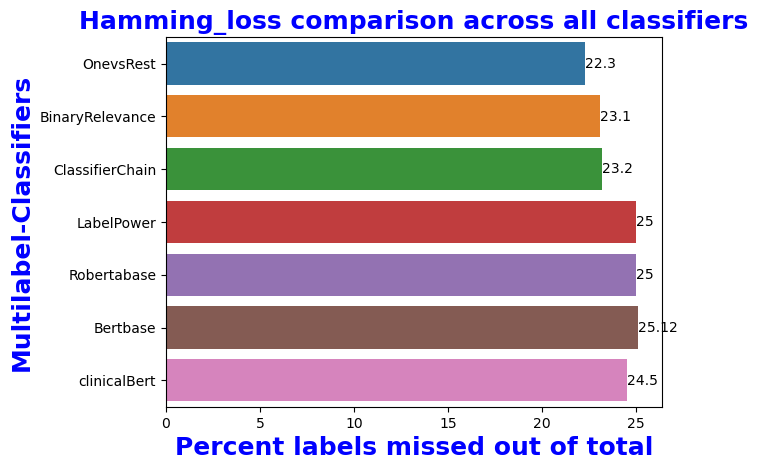

In [391]:
correct_predict = pd.DataFrame.from_dict(dic_hamming)
ax= sns.barplot(data=correct_predict, y='Classifiers', x="Hamming_loss")
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Hamming_loss comparison across all classifiers', fontweight = "bold",fontsize=18, color='blue')
plt.ylabel('Multilabel-Classifiers', fontweight = "bold",fontsize=18, color='blue')
plt.xlabel('Percent labels missed out of total', fontweight = "bold",fontsize=18, color='blue')

Text(0.5, 0, 'Percent labels predicted correctly of total')

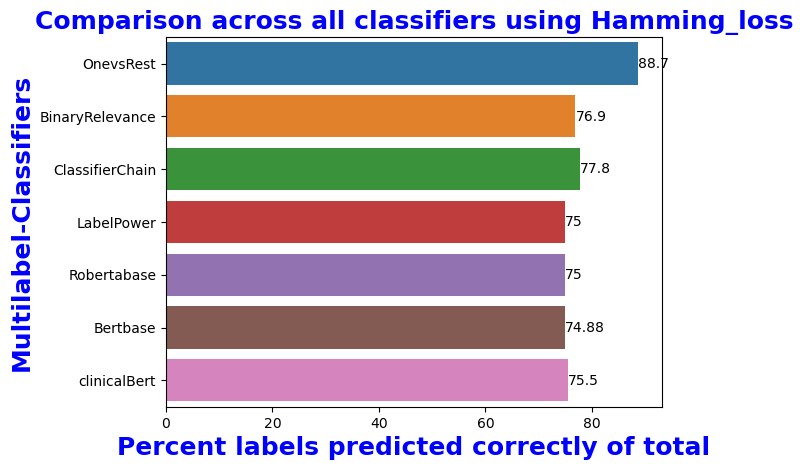

In [393]:
ax= sns.barplot(data=correct_predict, y='Classifiers', x="Correct_Predicted")
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Comparison across all classifiers using Hamming_loss', fontweight = "bold",fontsize=18, color='blue')
plt.ylabel('Multilabel-Classifiers', fontweight = "bold",fontsize=18, color='blue')
plt.xlabel('Percent labels predicted correctly of total', fontweight = "bold",fontsize=18, color='blue')

In [371]:
xyz = [22.3, 23.1, 23.2, 25, 25, 25.12, 24.5]

# 100-[[22.3, 23.1, 23.2, 25, 25, 25.12, 24.5]]

# 100-xyz.to_numpy()
# from array import array
# array("i", xyz)

[int(item) for item in xyz]

[88.7, 76.9, 778, 75, 74.88, 75.5]

[22, 23, 23, 25, 25, 25, 24]